In [19]:
# importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [4]:
import warnings
warnings.filterwarnings('ignore')

#### library to see full columns
pd.set_option('display.max_columns',200)

pd.set_option('display.max_rows',200)

pd.set_option('display.width', 500)

In [ ]:
# Reading the csv File

In [5]:
df_tracks=pd.read_csv("C:/Users/PRASHANT/Desktop/Sportify Project/archive (1)/tracks.csv")

In [6]:
df_tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [7]:
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [59]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 586672 entries, 1922-02-22 to 2015-07-01
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586672 non-null  int64         
 3   explicit          586672 non-null  int64         
 4   artists           586672 non-null  object        
 5   id_artists        586672 non-null  object        
 6   danceability      586672 non-null  float64       
 7   energy            586672 non-null  float64       
 8   key               586672 non-null  int64         
 9   loudness          586672 non-null  float64       
 10  mode              586672 non-null  int64         
 11  speechiness       586672 non-null  float64       
 12  acousticness      586672 non-null  float64       
 13  instrumentalness  586672 non-null  float64 

In [9]:
df_tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [10]:
# creating variable
missing_data=df_tracks.isnull()
missing_data.head()

# creating a loop to find out the null values
# False = values are present
# True = values are missing

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

id
False    586672
Name: id, dtype: int64

name
False    586601
True         71
Name: name, dtype: int64

popularity
False    586672
Name: popularity, dtype: int64

duration_ms
False    586672
Name: duration_ms, dtype: int64

explicit
False    586672
Name: explicit, dtype: int64

artists
False    586672
Name: artists, dtype: int64

id_artists
False    586672
Name: id_artists, dtype: int64

release_date
False    586672
Name: release_date, dtype: int64

danceability
False    586672
Name: danceability, dtype: int64

energy
False    586672
Name: energy, dtype: int64

key
False    586672
Name: key, dtype: int64

loudness
False    586672
Name: loudness, dtype: int64

mode
False    586672
Name: mode, dtype: int64

speechiness
False    586672
Name: speechiness, dtype: int64

acousticness
False    586672
Name: acousticness, dtype: int64

instrumentalness
False    586672
Name: instrumentalness, dtype: int64

liveness
False    586672
Name: liveness, dtype: int64

valence
False    586672
Name: val

In [24]:
# Plots to see the outliers

In [11]:
#method 1 Creating a function

def plotvariable(df, variable):
    plt.figure(figsize=(16,4))
    
    #histogram
    plt.subplot(1,2,1)
    plt.hist(df[variable],alpha=0.5)
    
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[variable])
    plt.show()

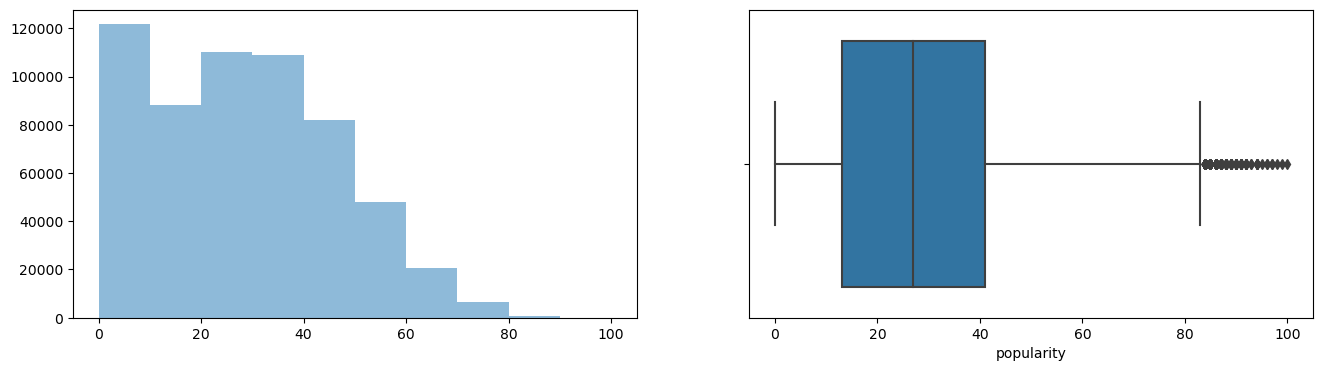

In [12]:
plotvariable(df_tracks,'popularity')

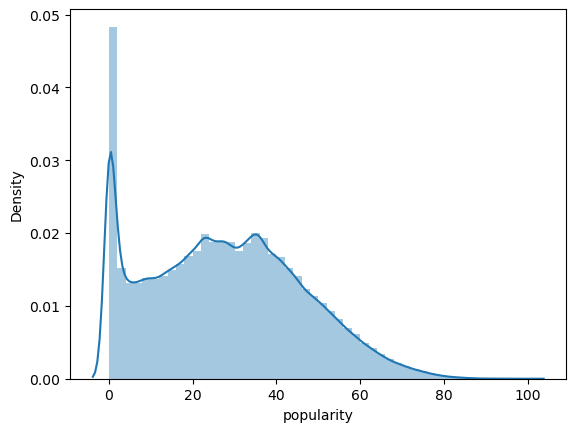

In [13]:
#method 2 Checking one by one
sns.distplot(df_tracks['popularity'])
plt.show()

In [14]:
df_tracks.popularity.describe()

count    586672.000000
mean         27.570053
std          18.370642
min           0.000000
25%          13.000000
50%          27.000000
75%          41.000000
max         100.000000
Name: popularity, dtype: float64

In [15]:
print(np.percentile(df_tracks['popularity'],95))
# Here in placeof 95 we can add any percentage that we want

59.0


In [16]:
print(np.percentile(df_tracks['popularity'],np.arange(0,100,25)))

[ 0. 13. 27. 41.]


In [17]:
def find_boundries(df,variable):
    # Finding out the interqurtile range
    Q1=df[variable].quantile(.25)
    Q3=df[variable].quantile(.75)
    IQR=Q3-Q1
    lower_boundry=Q1-1.5*IQR
    upper_boundry=Q3+1.5*IQR

    return upper_boundry,upper_boundry

In [18]:
lower_population,upper_population=find_boundries(df_tracks,'popularity')
print('upper',upper_population)
print('lower',lower_population)

upper 83.0
lower 83.0


In [19]:
outlier_popularity=np.where(df_tracks['popularity']>upper_population,True,
                            np.where(df_tracks['popularity']<lower_population,True,False))

In [20]:
outlier_popularity

array([ True,  True,  True, ...,  True,  True,  True])

In [21]:
df_tracks.shape

(586672, 20)

In [22]:
engineer_data=df_tracks.loc[~(outlier_popularity),]

In [23]:
df_tracks.shape

(586672, 20)

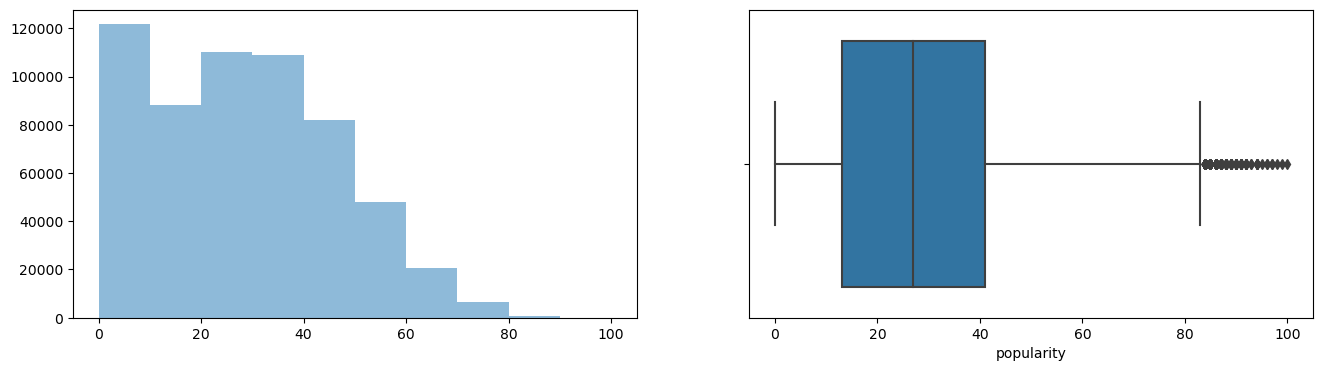

In [24]:
plotvariable(df_tracks,'popularity')

In [25]:
df_tracks['name'].astype('category').value_counts()

Summertime                               101
Intro                                     92
Year 3000                                 91
Hold On                                   87
2000 Years                                76
                                        ... 
Ille Belle Aare                            1
Illathe Kallyanathinu (Duet)               1
Illat pitenee                              1
Illasta aamuun - Early in the Morning      1
화려하지 않은 고백 Confession Is Not Flashy        1
Name: name, Length: 446474, dtype: int64

In [26]:
print(df_tracks.name.unique)

<bound method Series.unique of 0                                       Carve
1         Capítulo 2.16 - Banquero Anarquista
2          Vivo para Quererte - Remasterizado
3               El Prisionero - Remasterizado
4                         Lady of the Evening
                         ...                 
586667                                    云与海
586668                                  blind
586669              What They'll Say About Us
586670                        A Day At A Time
586671                       Mar de Emociones
Name: name, Length: 586672, dtype: object>


In [28]:
sorted_df=df_tracks.sort_values('popularity',ascending=True).head(10)
sorted_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
546130,181rTRhCcggZPwP2TUcVqm,"Newspaper Reports On Abner, 20 February 1935",0,896575,0,"['Norris Goff', 'Chester Lauck', 'Carlton Bric...","['3WCwCPDMpGzrt0Qz6quumy', '7vk8UqABg0Sga78GI3...",1935-02-20,0.595,0.262,8,-17.746,1,0.9320,0.993,0.007510,0.0991,0.320,79.849,4
546222,0yOCz3V5KMm8l1T8EFc60i,恋は水の上で,0,188440,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.418,0.388,0,-8.580,1,0.0358,0.925,0.000014,0.1050,0.439,94.549,4
546221,0y48Hhwe52099UqYjegRCO,私の誕生日,0,173467,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.642,0.178,5,-11.700,1,0.0501,0.993,0.000943,0.0928,0.715,119.013,4
546220,0xCmgtf9ka07hkZg3D6PaV,エル・チョクロ (EL CHOCLO),0,205280,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.695,0.467,0,-12.236,0,0.0422,0.827,0.000000,0.0861,0.756,125.941,4
546219,0tBXS3VuCPX7KWUFH2nros,恋は不思議なもの,0,185733,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.389,0.388,2,-8.221,1,0.0351,0.869,0.000000,0.0924,0.372,72.800,4
546218,0qrKnQtYDVJhKFAXTHYVS9,ゆうべはどうしたの (WHATSA MALLA U),0,183427,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.631,0.249,5,-11.883,1,0.0355,0.951,0.000000,0.0814,0.517,131.097,4
546217,0nqsDxOeKSwEzp3AUQAAqS,"Screen Director's Playhouse, Music For Million...",0,1767071,0,"['Wilms Herbert', 'June Allyson', 'Joseph Kear...","['2rbm8QWvmnVwxFo84EVM1h', '4yW5adMgyIfHFzaL9i...",1949-04-10,0.533,0.317,7,-13.047,1,0.9180,0.682,0.000000,0.3330,0.336,76.836,4
546216,0kGEdsxVLYjCdfxM9tbezd,ブルーマンボ,0,162147,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.529,0.546,0,-6.462,0,0.0418,0.784,0.000000,0.3750,0.903,128.604,4
546215,0bc3PUZurUUXrY7yqoOxjq,"Screen Director's Playhouse, Trade Winds direc...",0,1776652,0,"['Wally Maher', 'Tay Garnett', 'Lurene Tuttle'...","['7hkhJTTI3VnUGVWUt8SJXT', '3kYeeIpRCgJz4fQYDv...",1949-05-19,0.599,0.321,0,-15.428,0,0.9330,0.808,0.000000,0.5570,0.379,93.025,4
546214,0Wwm0ruSjYMIiWG0nyAI1F,"Screen Director's Playhouse, It's A Wonderful ...",0,1767576,0,"['Joseph Granby', 'Jimmy Stewart', 'Irene Tedr...","['6GK59BC4LJzqR0OpHAX2S3', '58BzBaExrnrx898sby...",1949-05-08,0.645,0.341,8,-12.177,1,0.8670,0.690,0.000000,0.1530,0.431,117.591,4


In [29]:
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In [33]:
most_popular=df_tracks.query('popularity>90',inplace=False).sort_values('popularity',ascending=False)
most_popular[:10]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3


In [34]:
df_tracks.set_index("release_date",inplace=True)
df_tracks.index=pd.to_datetime(df_tracks.index)
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [40]:
df_tracks[['artists']].iloc[16]

artists    ['Fernando Pessoa']
Name: 1922-06-01 00:00:00, dtype: object

In [41]:
df_tracks["duration"]=df_tracks["duration_ms"].apply(lambda x:round(x/1000))
df_tracks.drop("duration_ms",inplace=True,axis=1)

In [42]:
df_tracks.duration.head()

release_date
1922-02-22    127
1922-06-01     98
1922-03-21    182
1922-03-21    177
1922-01-01    163
Name: duration, dtype: int64

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'time_signature'),
 Text(11.5, 0, 'duration')]

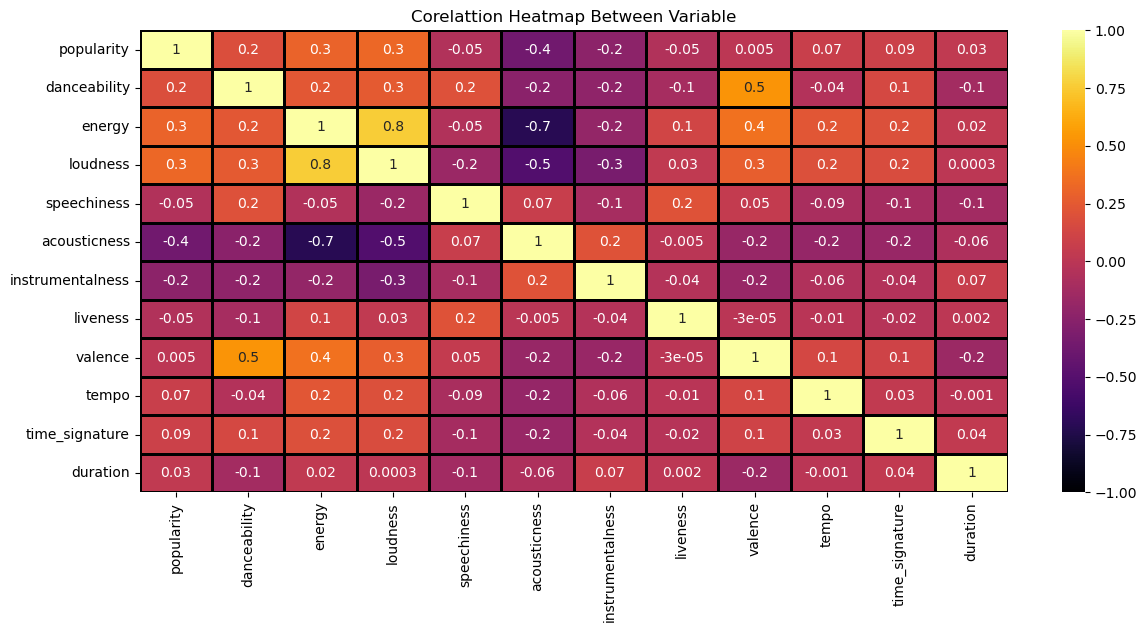

In [46]:
corr_df=df_tracks.drop(["key","mode","explicit"],axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True,fmt=".1g",vmin=-1,center=0,cmap="inferno",linewidths=1,linecolor="Black")
heatmap.set_title("Corelattion Heatmap Between Variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)


In [47]:
sample_df=df_tracks.sample(int(0.004*len(df_tracks)))
print(len(sample_df))

2346


[Text(0.5, 1.0, 'Loudness vs Energy')]

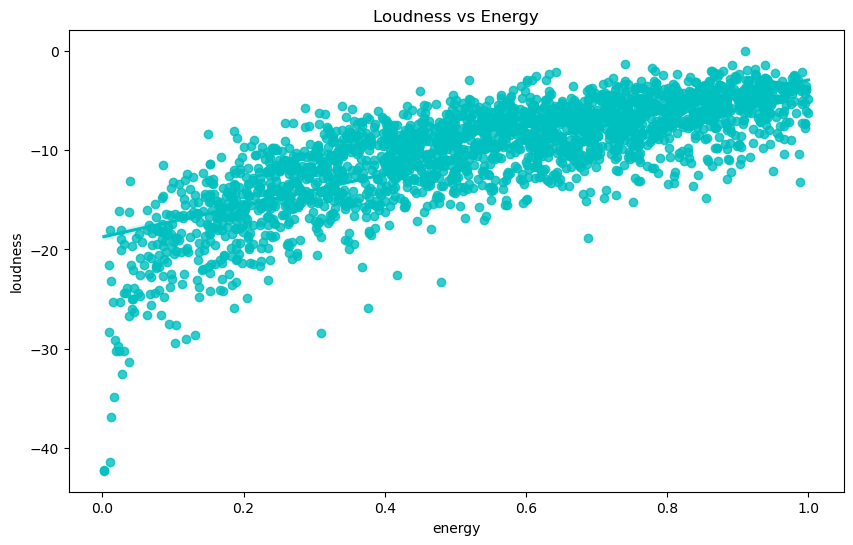

In [50]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y="loudness",x="energy",color="c").set(title="Loudness vs Energy")

[Text(0.5, 1.0, 'popularity vs acousticness')]

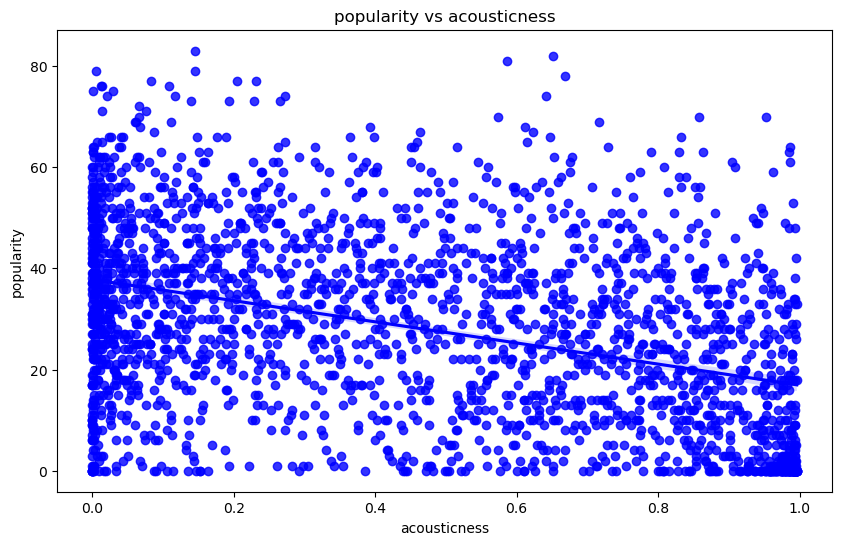

In [52]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y="popularity",x="acousticness",color="b").set(title="popularity vs acousticness")

In [53]:
df_tracks['dates']=df_tracks.index.get_level_values('release_date')
df_tracks.dates=pd.to_datetime(df_tracks.dates)
years=df_tracks.dates.dt.year

In [ ]:
df_tracks

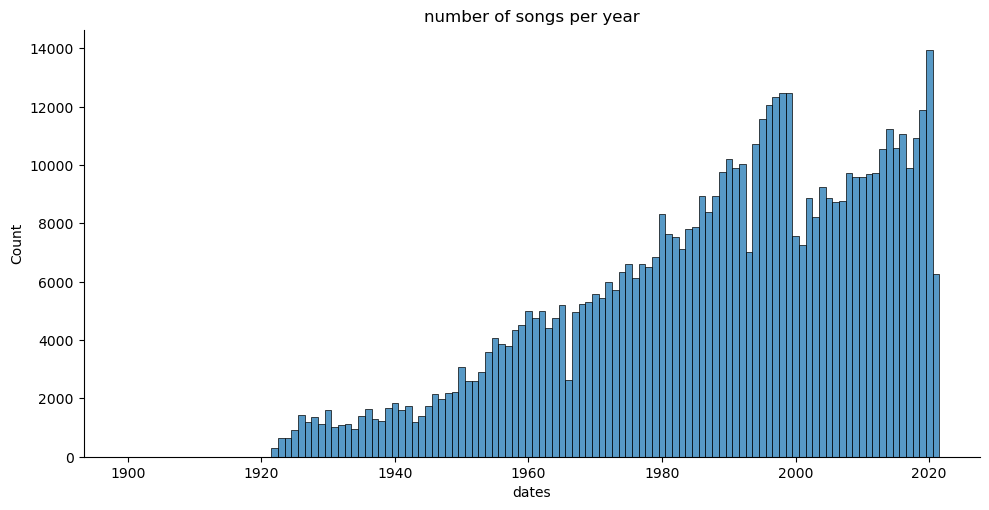

In [56]:
sns.displot(years,discrete=True,aspect=2,height=5,kind="hist").set(title="number of songs per year")

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 [Text(0, 0, '1900'),
  Text(1, 0, '1922'),
  Text(2, 0, '1923'),
  Text(3, 0, '1924'),
  Text(4, 0, '1925'),
  Text(5, 0, '1926'),
  Text(6, 0, '1927'),
  Text(7, 0, '1928'),
  Text(8, 0, '1929'),
  Text(9, 0, '1930'),
  Text(10, 0, '1931'),
  Text(11, 0, '1932'),
  Text(12, 0, '1933'),
  Text(13, 0, '1934'),
  Text(14, 0, '1935'),
  Text(15, 0, '1936'),
  Text(16, 0, '1937'),
  Text(17, 0, '1938'),
  Text(18, 0, '1939'),
  

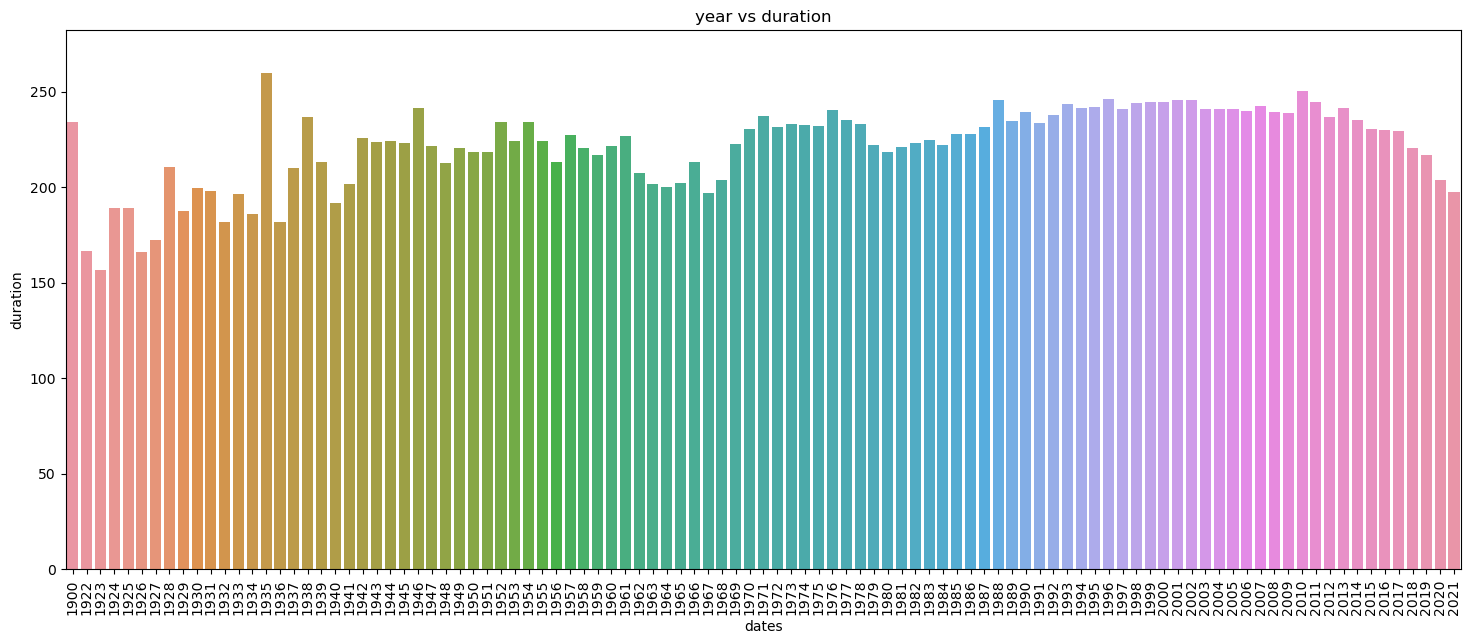

In [57]:
total_dr=df_tracks.duration
fig_dims=(18,7)
fig,ax=plt.subplots(figsize=fig_dims)
fig=sns.barplot(x=years,y=total_dr,ax=ax,errwidth=False).set(title="year vs duration")
plt.xticks(rotation=90)

KeyboardInterrupt: 

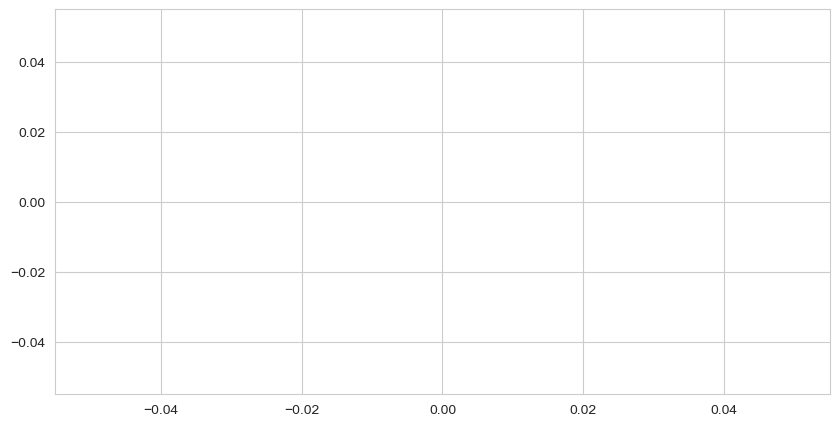

In [60]:
total_dr=df_tracks.duration
sns.set_style(style="whitegrid")
fig_dims=(10,5)
fig,ax=plt.subplots(figsize=fig_dims)
fig=sns.lineplot(x=years,y=total_dr,ax=ax).set(title="year vsduration")
plt.xticks(rotation=60)

In [61]:
df_genere=pd.read_csv("C:/Users/PRASHANT/Desktop/Sportify Project/archive/SpotifyFeatures.csv")

In [63]:
df_genere.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [72]:
df_genere.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

Text(0, 0.5, 'genre')

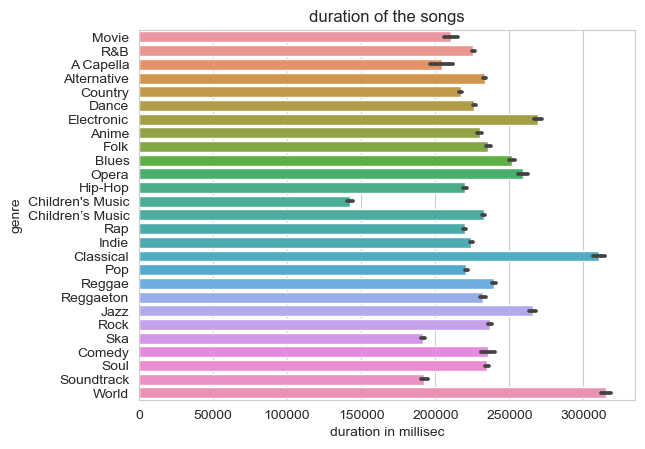

In [68]:
plt.title("duration of the songs")
sns.color_palette("rocket",as_cmap=True)
sns.barplot(y="genre",x="duration_ms",data=df_genere)
plt.xlabel("duration in millisec")
plt.ylabel("genre")

[Text(0.5, 1.0, 'top 5 genre by popularity')]

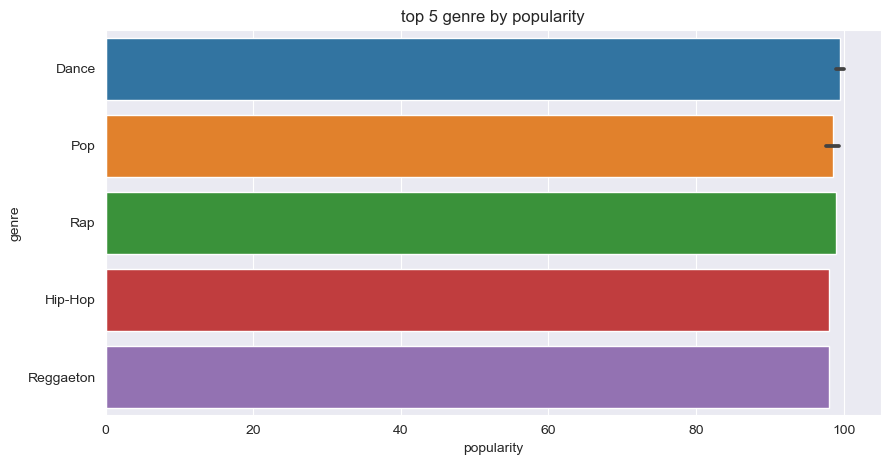

In [70]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(10,5))
famous=df_genere.sort_values("popularity",ascending=False).head(10)
sns.barplot(y='genre',x='popularity',data=famous).set(title="top 5 genre by popularity")